<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [65]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import PowerTransformer
from scipy import stats

sns.set(color_codes = True)
pd.set_option('display.max_rows', 50)

plt.style.use('fivethirtyeight')

%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [2]:
# Read Titanic Dataset
titanic_csv = '../../data/titanic.csv'
titanic = pd.read_csv(titanic_csv)

# Explore Dataset

## Head

In [3]:
# Check Head
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tail

In [4]:
# Check Tail
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Shape

Find shape of dataset.

In [5]:
# ANSWER
titanic.shape

(891, 12)

## Check Types of Data

Check types of data you have

In [6]:
# ANSWER
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Check Null Values

Check whether dataset have any null values.

In [7]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Check titanic data again
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fill Null Values

Is there any null values in any columns? 

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every steps

### Age

In [9]:
# ANSWER
titanic[titanic['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


<AxesSubplot:>

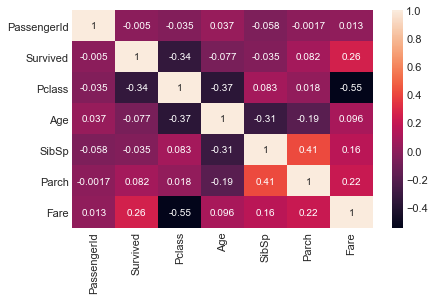

In [10]:
# titanic[['Age']].fillna(-1)
# Find correlation of features
corr = titanic.corr()
sns.heatmap(corr, annot=True)
# From the heatmap, we can see Age don't have many high positive correlation.
# The approach can be find the median age by sex

In [11]:
titanic.groupby(["Sex"])["Age"].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [43]:
titanic["Age"] = titanic.groupby(["Sex"])["Age"].apply(lambda a: a.fillna(a.median()))

In [13]:
# Check if age is no null
titanic["Age"].isna().sum()

0

### Cabin

In [14]:
# ASNWER
null_cabins = titanic[pd.isna(titanic["Cabin"])]
null_cabins

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,NaN,S


In [15]:
unique_fare = titanic["Fare"].unique()
print(type(unique_fare))
print(f"Mean fare is {unique_fare.mean()} - Median fare is {np.median(unique_fare)}")

<class 'numpy.ndarray'>
Mean fare is 40.549647580645164 - Median fare is 21.0375


In [16]:
null_cabins.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,687.0,443.208151,259.215905,1.00,214.5000,441.0,664.5,891.0000
Survived,687.0,0.299854,0.458528,0.00,0.0000,0.0,1.0,1.0000
Pclass,687.0,2.639010,0.589602,1.00,2.0000,3.0,3.0,3.0000
Age,687.0,27.753639,11.833341,0.42,21.5000,28.0,32.0,74.0000
SibSp,687.0,0.547307,1.207492,0.00,0.0000,0.0,1.0,8.0000
Parch,687.0,0.365357,0.827106,0.00,0.0000,0.0,0.0,6.0000
Fare,687.0,19.157325,28.663343,0.00,7.8771,10.5,23.0,512.3292


In [17]:
null_cabins.groupby("Pclass").count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,40,40,40,40,40,40,40,40,40,0,40
2,168,168,168,168,168,168,168,168,168,0,168
3,479,479,479,479,479,479,479,479,479,0,479


The majority of people in non-value cabin were from Class 3. Fill with Not Available

In [18]:
titanic["Cabin"] = titanic["Cabin"].fillna("N/A")

In [19]:
titanic["Cabin"].isna().sum()

0

### Embarked

In [20]:
# ANSWER
# titanic[['Embarked']].isnull().fillna(np.nan)
null_embarked = titanic[pd.isna(titanic['Embarked'])]
null_embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Miss Rose Amélie Icard, 38, was born in Vaucluse, France on 31 October 1872, her father Marc Icard lived at Mafs á Murs (?).
She boarded the Titanic at Southampton as maid to Mrs George Nelson Stone. She travelled on Mrs Stone's ticket (#113572).
Mrs Stone and Miss Icard were rescued by the Carpathia in lifeboat 6. 
https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html

=> Based on this history piece. Set their Embarked as S (Southhampton)

In [21]:
titanic["Embarked"] = titanic["Embarked"].fillna("S")

In [22]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Describe

Describe your dataset.

In [23]:
# ANSWER
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.441268,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.018747,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [24]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

## Pclass

Use barchart to find relationship between survived and pclass.  Note your findings.

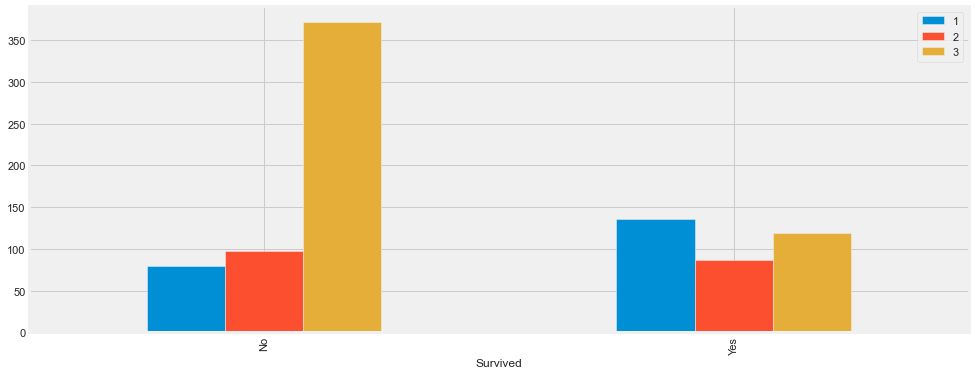

In [25]:
# ANSWER
bar_charts(titanic, titanic["Pclass"])

People with first class ticket had higher chance to survive. Most unsurvived people were with 3rd class tickets => Higher class people have more priority

## Sex

Use barchart to find relationship between survived and sex.  Note your findings.

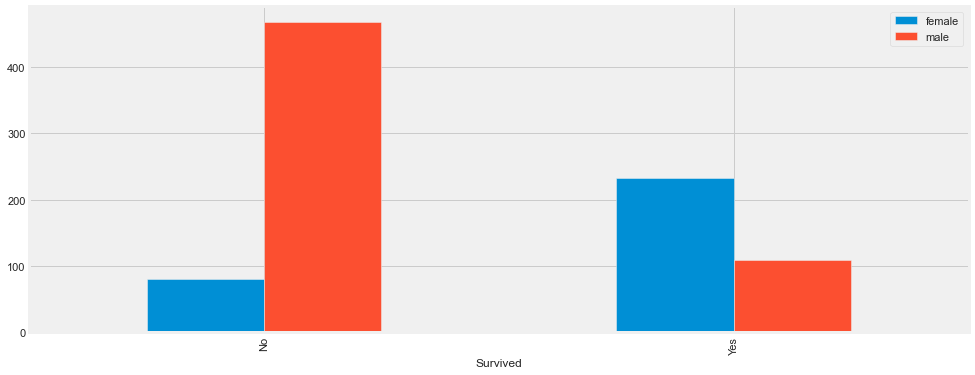

In [26]:
# ANSWER
bar_charts(titanic, titanic["Sex"])

The number of survived female were higher than male. => Female has higher priority to be rescued

## Parch

Parch = Number of parents of children travelling with each passenger.

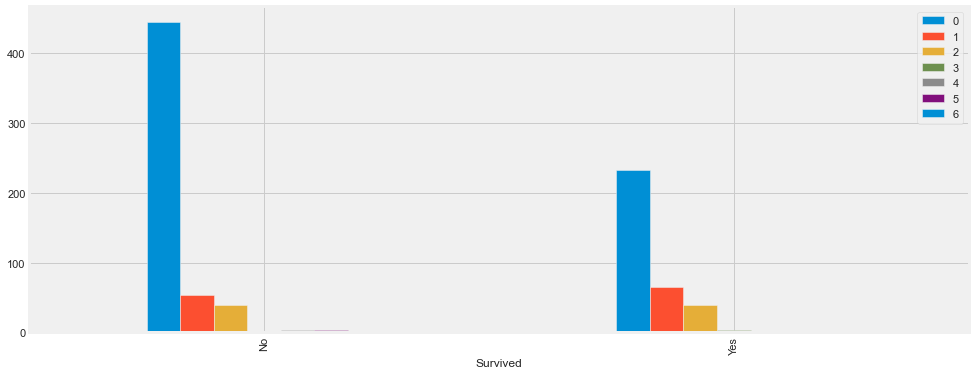

In [27]:
# ANSWER
bar_charts(titanic, titanic["Parch"])

## SibSp

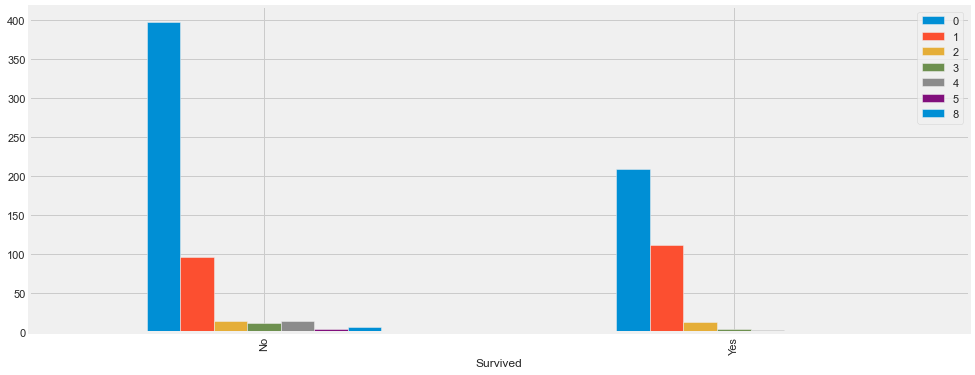

In [28]:
bar_charts(titanic, titanic["SibSp"])

## Embarked

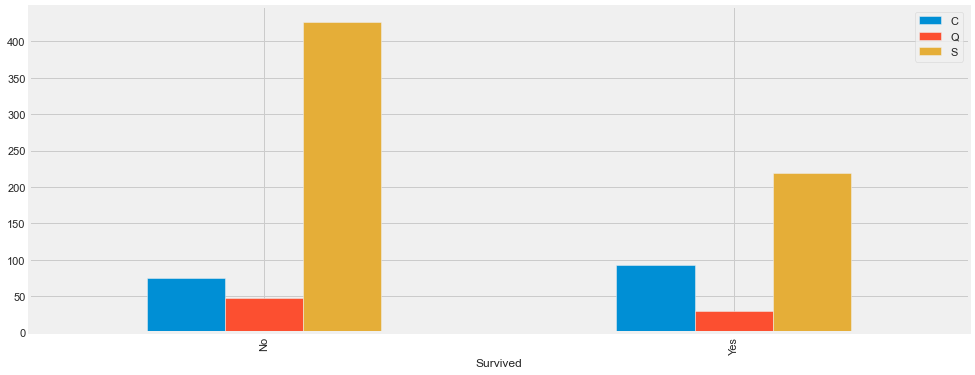

In [29]:
bar_charts(titanic, titanic["Embarked"])

The majoriy of people were from Southhampton => The number of non/survived people from Southhampton were higher than Queenstown and Cherbourg

# Feature Engineering

Create some new features from existing feature.

## Fare Class

Create a new class based on their fare. Is there any relationship between fare and survival? 

In [30]:
def create_fare_class(x):
    if x.Fare > 30:
        fare_class = 1
    elif x.Fare > 20 and x.Fare <= 30:
        fare_class = 2
    elif x.Fare > 10 and x.Fare <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

In [31]:
# ANSWER
new_class = titanic.apply(create_fare_class, axis='columns')
new_class

0      4
1      1
2      4
3      1
4      4
      ..
886    3
887    2
888    2
889    2
890    4
Length: 891, dtype: int64

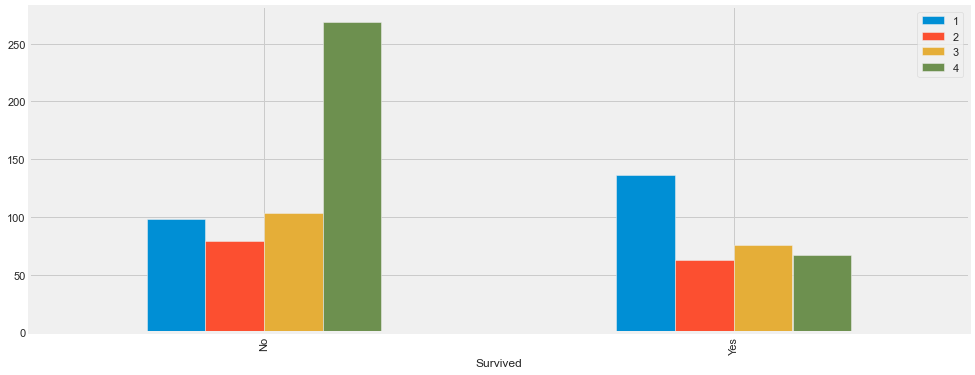

In [32]:
bar_charts(titanic, new_class)

The lower the fare class, the lower chance to survive

## Age Class

In [33]:
# ANSWER


In [34]:
def create_age_class(x):
    if x.Age > 60:
        age_class = 5
    elif x.Age > 35 and x.Age <= 60:
        age_class = 4
    elif x.Age > 25 and x.Age <= 35:
        age_class = 3
    elif x.Age > 16 and x.Age <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [35]:
# ANSWER
new_age_class = titanic.apply(create_age_class, axis='columns')
new_age_class

0      2
1      4
2      3
3      3
4      3
      ..
886    3
887    2
888    3
889    3
890    3
Length: 891, dtype: int64

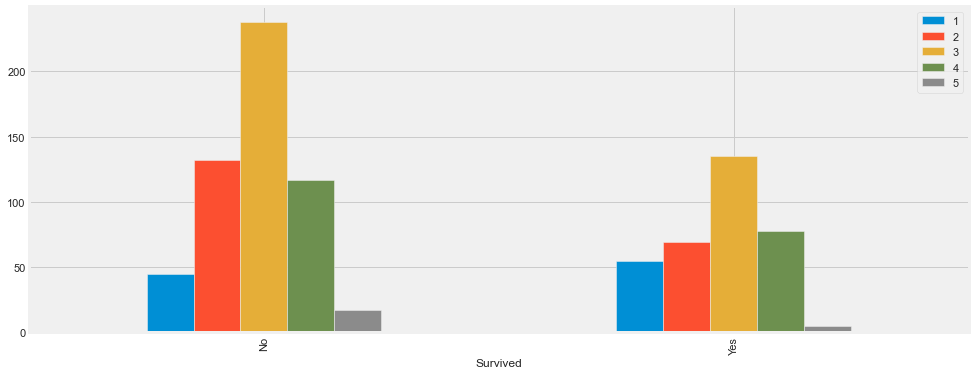

In [36]:
bar_charts(titanic, new_age_class)

People between age of 25 and 35 tend to have lower chance to survive. It might be because they took risks to rescue other people.

# Staistical Overview

## Correlation

Find correlation between `survived` and other features.

In [37]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035734,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.073296,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.338056,0.083081,0.018443,-0.549500
Age,0.035734,-0.073296,-0.338056,1.000000,-0.236376,-0.176038,0.094161
SibSp,-0.057527,-0.035322,0.083081,-0.236376,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.176038,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.094161,0.159651,0.216225,1.000000


# [BONUS] Hypothesis Testing
---
Hypothesis testing is the use of statistics to determine the probability that a given hypothesis is true. The usual process of hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group. 

Collect two sets of data, one with the passenger greater than 35 years of age and another one with the passenger younger than 35. The sample size should ideally be the same but it can be different. Lets say that the sample sizes is 100.

In [57]:
# ANSWER
N = 100
titanic_old = titanic[titanic["Age"] > 35].sample(N)
titanic_old

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
771,772,0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,N/A,S
400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,N/A,S
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,N/A,S
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,N/A,S
...,...,...,...,...,...,...,...,...,...,...,...,...
471,472,0,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,N/A,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,N/A,S


In [58]:
titanic_young = titanic[titanic["Age"] < 35].sample(N)
titanic_young

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,N/A,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,N/A,S
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,N/A,S
...,...,...,...,...,...,...,...,...,...,...,...,...
376,377,1,3,"Landergren, Miss. Aurora Adelia",female,22.0,0,0,C 7077,7.2500,N/A,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,N/A,S
284,285,0,1,"Smith, Mr. Richard William",male,29.0,0,0,113056,26.0000,A19,S


### Set alpha (Let alpha = 0.05)

> Identify a test statistic that can be used to assess the truth of the null hypothesis.

In [66]:
# ANSWER
alpha = 0.05

### Calculate point estimate

In [67]:
a = titanic_young['Survived']
b = titanic_old['Survived']

In [71]:
## Calculate the variance to get the standard deviation
var_a = a.var()
var_b = b.var()

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)
s

0.485132492576549

### Calculate test statistic

In [72]:
## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))
t

-0.29151079014769304

### Find the p-value

> Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [74]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)
p

0.6145170680616393

In [75]:
print("t = " + str(t))
print("p = " + str(2*p))

t = -0.29151079014769304
p = 1.2290341361232786


### Interpret results

> Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [76]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [77]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = -0.291510790147693
p = 0.7709658638767214
We fail to reject our null hypothesis.




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



